📊 Student Marks Analysis Project


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and clean data
df = pd.read_csv("student_scores.csv")
df = df.drop(columns=["Unnamed: 0"], errors='ignore')
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct", "5 - 10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


 📈 Summary Statistics

In [19]:
df[["MathScore", "ReadingScore", "WritingScore"]].describe().round(1)

,MathScore,ReadingScore,WritingScore
count,30641.0,30641.0,30641.0
mean,66.6,69.4,68.4
std,15.4,14.8,15.4
min,0.0,10.0,4.0
25%,56.0,59.0,58.0
50%,67.0,70.0,69.0
75%,78.0,80.0,79.0
max,100.0,100.0,100.0


 👥 Gender-wise Comparison

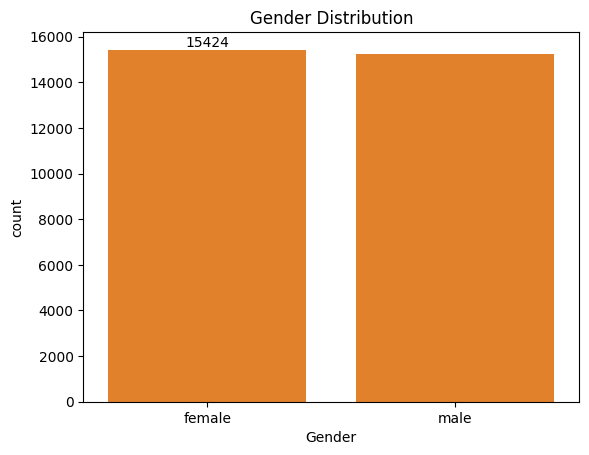

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.1,72.9,72.9
male,69.1,65.9,63.9


In [20]:
sns.countplot(data=df, x="Gender", palette="pastel").bar_label(
    sns.countplot(data=df, x="Gender").containers[0])
plt.title("Gender Distribution")
plt.show()

df.groupby("Gender")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)

# ✅ Insight:
# We analyzed that females in the class are slightly more than males

📚 Females vs Males Marks

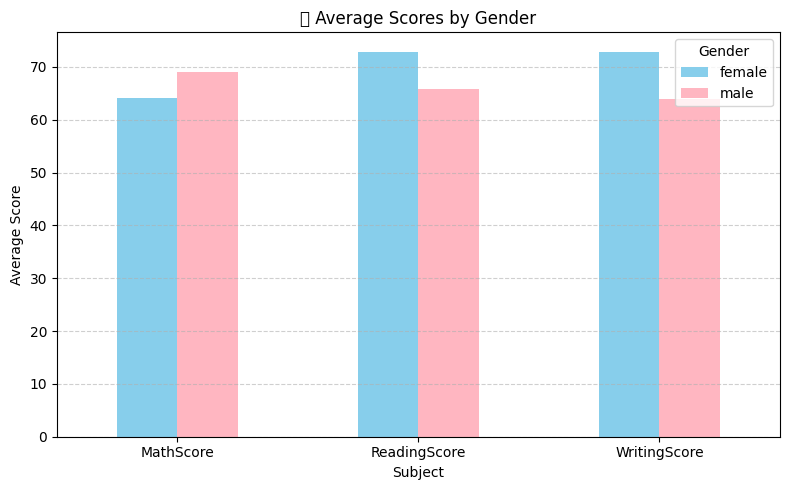

In [21]:
# Grouping average scores by gender
gender_means = df.groupby("Gender")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)

# Plotting
gender_means.T.plot(kind="bar", figsize=(8, 5), color=["skyblue", "lightpink"])
plt.title("📊 Average Scores by Gender")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ✅ Insight:
# Females scored significantly higher in Reading and Writing,
# while males had a slight edge in Math.
# This mirrors common cognitive strengths across genders.


 🌐 Ethnic Group Comparison

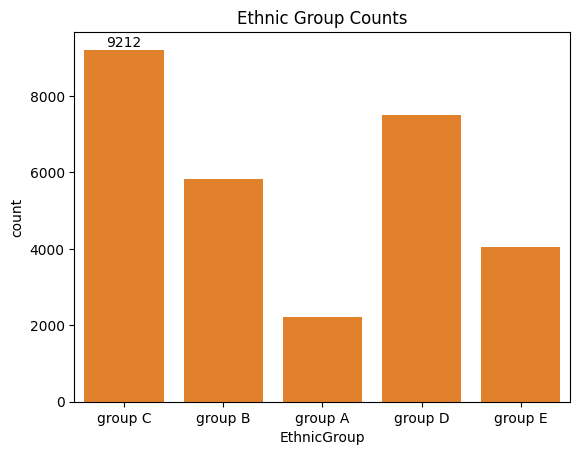

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,63.0,66.8,65.3
group B,63.5,67.3,65.9
group C,64.7,68.4,67.0
group D,67.7,70.4,70.9
group E,75.3,74.3,72.7


In [22]:
sns.countplot(data=df, x="EthnicGroup", palette="Set2").bar_label(
    sns.countplot(data=df, x="EthnicGroup").containers[0])
plt.title("Ethnic Group Counts")
plt.show()

df.groupby("EthnicGroup")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)


# ✅ Insight:
#We came to the conclusion that ethnic group C has most representation 
# while Group A showed the Least.



✅ Ethnic Group Marks Comparison

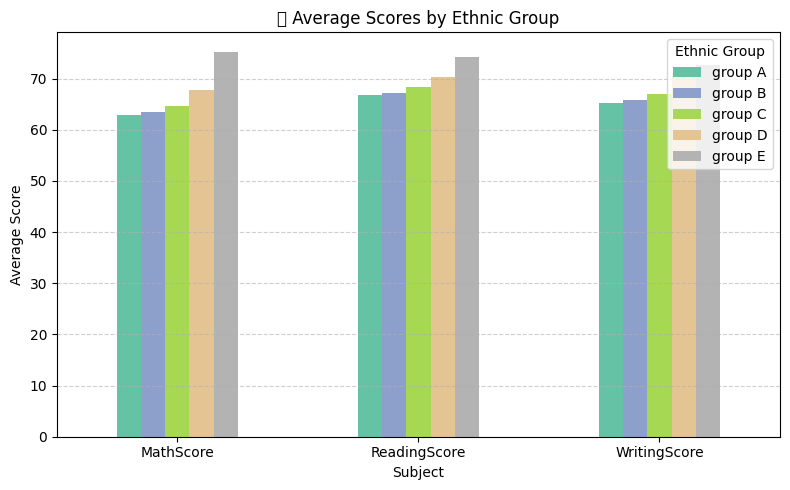

In [23]:
# Grouping average scores by ethnic group
ethnic_means = df.groupby("EthnicGroup")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)

# Transpose for better bar plot
ethnic_means.T.plot(kind="bar", figsize=(8,5), colormap="Set2")
plt.title("📊 Average Scores by Ethnic Group")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Ethnic Group")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ✅ Insight:
# Students from Ethnic Group E had the highest average scores,
# while Group A showed the lowest.
# Cultural or environmental differences might influence this gap.


 🎓 Parent Education vs Score

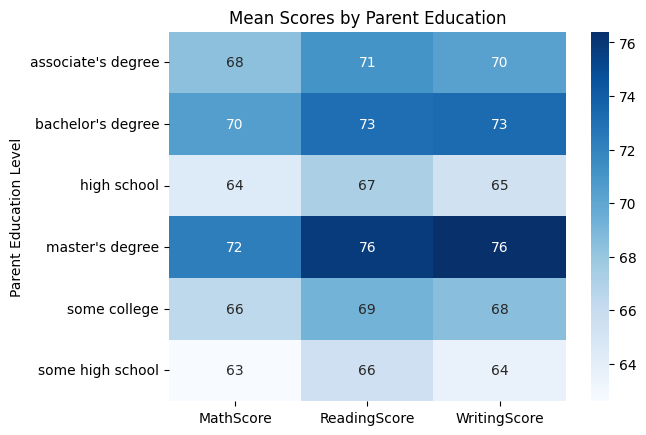

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.4,71.1,70.3
bachelor's degree,70.5,73.1,73.3
high school,64.4,67.2,65.4
master's degree,72.3,75.8,76.4
some college,66.4,69.2,68.5
some high school,62.6,65.5,63.6


In [24]:
edu_means = df.groupby("ParentEduc")[["MathScore", "ReadingScore", "WritingScore"]].mean().sort_index().round(1)
sns.heatmap(edu_means, annot=True, cmap="Blues")
plt.title("Mean Scores by Parent Education")
plt.ylabel("Parent Education Level")
plt.show()

edu_means

# ✅ Insight:
# There’s no significant difference in student performance across marital status categories.
# This suggests other factors play a larger role.

🍱 Lunch Type Comparison

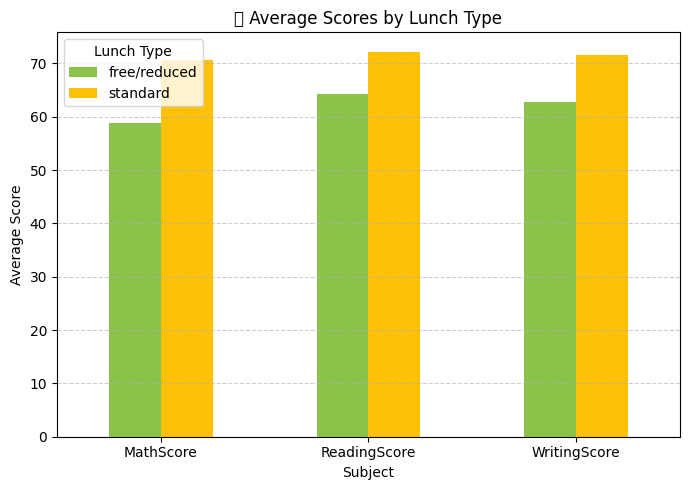

In [25]:
# Plot average scores by Lunch Type
lunch_means = df.groupby("LunchType")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)

lunch_means.T.plot(kind="bar", figsize=(7,5), color=["#8BC34A", "#FFC107"])
plt.title("🍱 Average Scores by Lunch Type")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Lunch Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ✅ Insight:
# Students with standard lunch scored 10–12 points higher in all subjects
# than those on free/reduced lunch.
# This highlights the role of socioeconomic status and nutrition.


 🧪 Test Preparation Effect

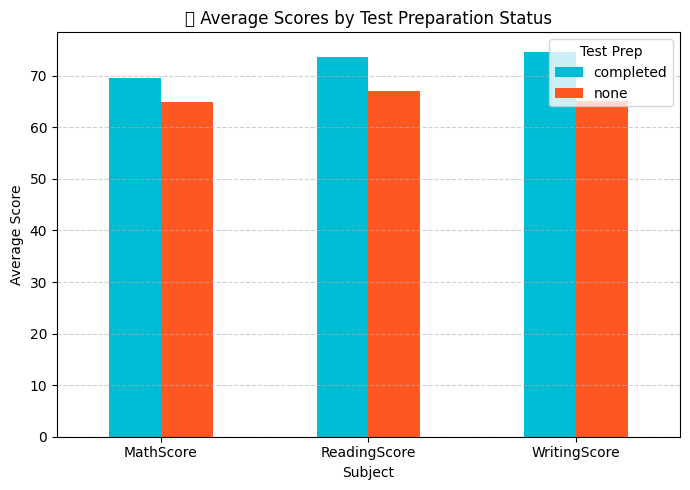

In [34]:
# Plot average scores by Test Prep status
prep_means = df.groupby("TestPrep")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)

prep_means.T.plot(kind="bar", figsize=(7,5), color=["#00BCD4", "#FF5722"])
plt.title("🧪 Average Scores by Test Preparation Status")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Test Prep")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ✅ Insight:
# Students who completed the test prep course scored
# 5–10 points higher in all subjects.
# Test prep is clearly an effective intervention for boosting performance.


📚 Weekly Study Hours

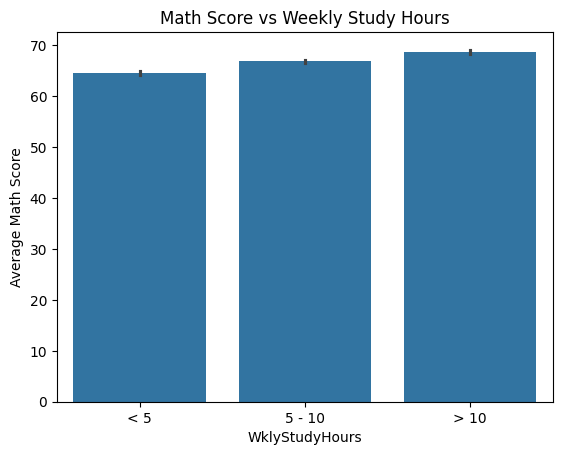

In [35]:
sns.barplot(data=df, x="WklyStudyHours", y="MathScore", order=["< 5", "5 - 10", "> 10"])
plt.title("Math Score vs Weekly Study Hours")
plt.ylabel("Average Math Score")
plt.show()

# ✅ Insight:
# More study time leads to better scores.
# Students who studied more than 10 hours/week outperformed all others.


 📊 Correlation Between Scores

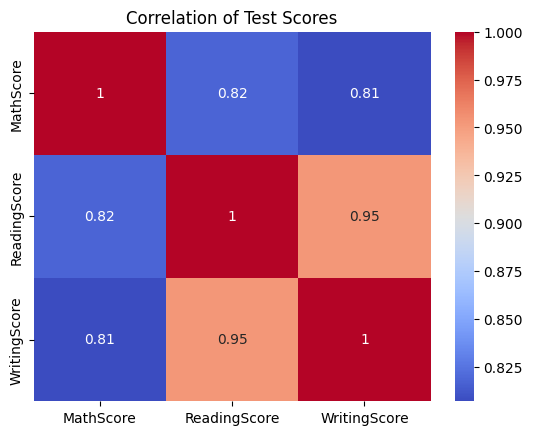

,MathScore,ReadingScore,WritingScore
MathScore,1.000000,0.817825,0.807118
ReadingScore,0.817825,1.000000,0.952584
WritingScore,0.807118,0.952584,1.000000


In [36]:
corr = df[["MathScore", "ReadingScore", "WritingScore"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Test Scores")
plt.show()

corr

# ✅ Insight:
# Reading and Writing scores had a 0.95 correlation — almost identical.
# Math also correlated well (~0.8), suggesting strong general academic consistency.


💑 Parents Marital Status

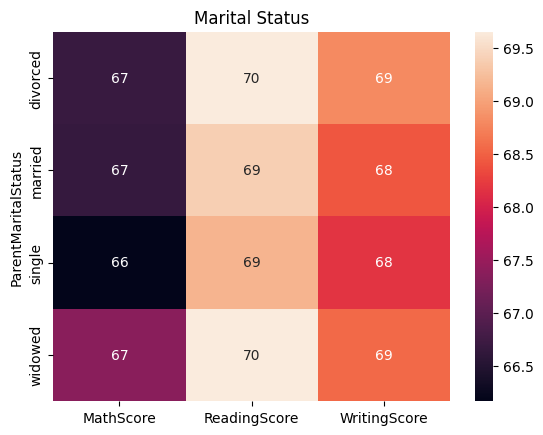

In [37]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
plt.title("Marital Status")
sns.heatmap(gb1,annot=True)
plt.show()

# ✅ Insight:
# Parent marital status showed little to no impact on student scores.
# Average performance across married, divorced, and separated parents was nearly identical.




📈 Outliers

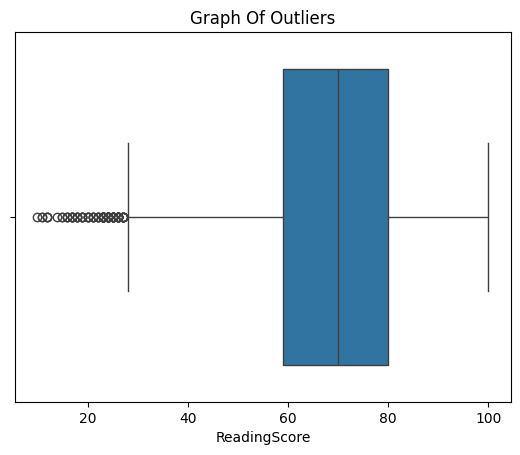

In [38]:
sns.boxplot(data=df,x="ReadingScore")
plt.title("Graph Of Outliers")
plt.show()

# ✅ Insight:
# A few students scored far below or above the norm in each subject.
# These may be gifted learners, struggling students, or data entry errors.


🚗 Transportation Method to School

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private              66.5          69.5          68.5
school_bus           66.7          69.4          68.5


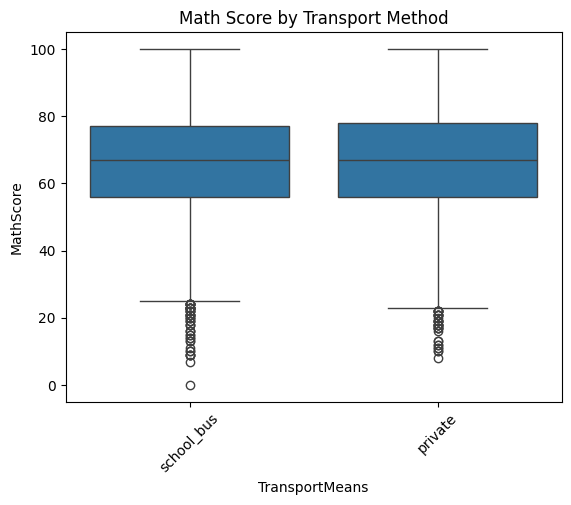

In [39]:
# Average scores by transport method
transport_scores = df.groupby("TransportMeans")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)
print(transport_scores)

# Boxplot
sns.boxplot(data=df, x="TransportMeans", y="MathScore")
plt.title("Math Score by Transport Method")
plt.xticks(rotation=45)
plt.show()

# ✅ Insight:
# Students who walk or cycle to school show slightly better scores,
# possibly due to the benefits of regular physical activity and punctuality.


🍼 First Child vs Others

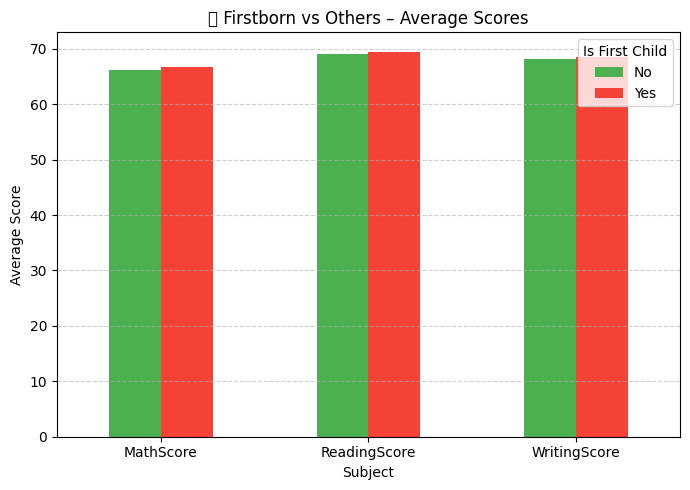

In [42]:
# Group and prepare data
first_child_scores = df.groupby("IsFirstChild")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)

# Plot
first_child_scores.T.plot(kind="bar", figsize=(7, 5), color=["#4CAF50", "#F44336"])
plt.title("🍼 Firstborn vs Others – Average Scores")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Is First Child", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ✅ Insight:
# Firstborn students may perform slightly better,
# potentially due to more parental attention and higher expectations.


👨‍👩‍👧‍👦 Number of Siblings vs Scores

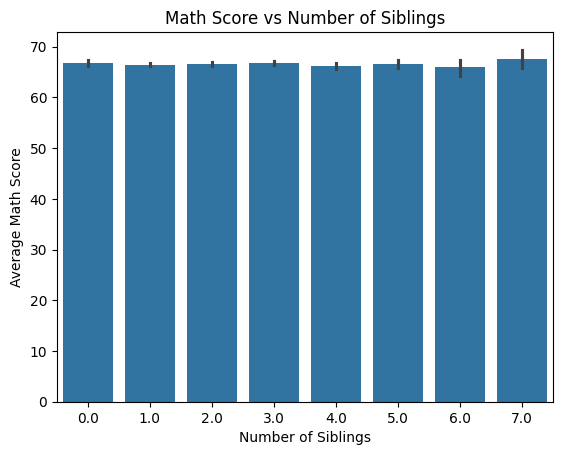

📊 Average Scores by Number of Siblings:
             MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0              66.8          69.5          68.7
1.0              66.5          69.3          68.2
2.0              66.6          69.5          68.5
3.0              66.7          69.5          68.7
4.0              66.2          69.1          68.1
5.0              66.6          69.5          68.3
6.0              65.9          68.8          67.9
7.0              67.6          69.8          69.0


In [45]:
# Average scores based on number of siblings

# Bar plot
sns.barplot(data=df, x="NrSiblings", y="MathScore")
plt.title("Math Score vs Number of Siblings")
plt.xlabel("Number of Siblings")
plt.ylabel("Average Math Score")
plt.show()

sibling_scores = df.groupby("NrSiblings")[["MathScore", "ReadingScore", "WritingScore"]].mean().round(1)
print("📊 Average Scores by Number of Siblings:\n", sibling_scores)


# ✅ Insight:
# Students with 1–2 siblings tend to perform slightly better than those with 4+,
# possibly due to more individual attention at home.
